In [1]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (8, 6)

## Controlling Gradient

In [2]:
# Using "stop_recording()"
x = tf.Variable(2.0)
y = tf.Variable(3.0)

with tf.GradientTape() as tape:
    x_sq = tf.square(x)
    with tape.stop_recording():
        y_sq = tf.square(y)
    z = x_sq + y_sq

grad = tape.gradient(z, {'x': x, 'y': y})
print('dz/dx:', grad['x'])
print('dz/dy:', grad['y'])

dz/dx: tf.Tensor(4.0, shape=(), dtype=float32)
dz/dy: None


In [3]:
x0 = tf.constant(0.0)
x1 = tf.constant(0.0)

with tf.GradientTape() as t0, tf.GradientTape() as t1:
    t0.watch(x0)
    t1.watch(x1)

    y0 = tf.math.sin(x0)
    y1 = tf.nn.sigmoid(x1)
    ys = y0 + y1
    #ys = tf.reduce_sum(y0 + y1) 

grad0 = t0.gradient(ys, x0)
grad1 = t1.gradient(ys, x1)

print(grad0.numpy())
print(grad1.numpy())


1.0
0.25


In [4]:
x = tf.constant(1.0)

with tf.GradientTape() as t1:
    t1.watch(x)
    with tf.GradientTape() as t2:
        t2.watch(x)
        y = x * x * x
    dydx = t2.gradient(y, x)
d2ydx2 = t1.gradient(dydx, x)

print('dy/dx:', dydx.numpy())
print('d2y/dx2:', d2ydx2.numpy())


dy/dx: 3.0
d2y/dx2: 6.0


## Jacobian

In [5]:
# With respect to scalar source
x = tf.linspace(-10.0, 10.0, 200+1)
h = tf.Variable(0.0)

with tf.GradientTape() as tape:
    y = tf.nn.sigmoid(x + h)
dydx = tape.jacobian(y, h)

print(dydx[:20].numpy())


[4.5397868e-05 5.0172184e-05 5.5448516e-05 6.1279752e-05 6.7724126e-05
 7.4846226e-05 8.2717248e-05 9.1415852e-05 1.0102921e-04 1.1165330e-04
 1.2339620e-04 1.3635683e-04 1.5074722e-04 1.6656723e-04 1.8402527e-04
 2.0338927e-04 2.2471859e-04 2.4840023e-04 2.7452319e-04 3.0338494e-04]


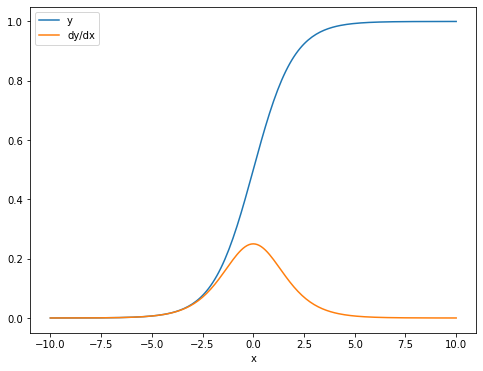

In [9]:
plt.plot(x.numpy(), y, label='y')
plt.plot(x.numpy(), dydx, label='dy/dx')
plt.legend()
_ = plt.xlabel('x')
plt.show()